# Introduction to neural network classification with TF

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Binary Classification
Let's try to visualize the data

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


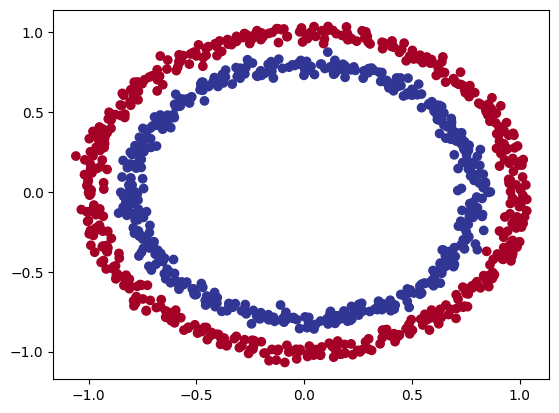

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
# first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

1. Create Model
2. Compile Model
3. Fit Model
4. Evaluate Model
5. Tweak
6. Evaluate...

In [9]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 11ms/step - loss: 1.7359 - accuracy: 0.5010
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7212 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7042 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 9ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 9ms/step - loss: 0.6949 - accuracy: 0.4960


In [10]:
# Let's try to improve model

model_1.fit(X,y,epochs=200, verbose=0)

Let's add an extra layer

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics =["accuracy"])

model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5050
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5090
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5140
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5190
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5240
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5270
Epoch 11/

## Improving our model

1. Create a model - add more layers or hidden units
2. Compiling a model - choose different optimization function
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X,y,epochs=100, verbose = 0)

In [13]:
# Evaluate
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5070


[0.697256863117218, 0.5070000290870667]

In [33]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
    Plots decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min,y_max,100))
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap = plt.cm.RdYlBu, alpha =0.7)
  plt.scatter(X[:,0],X[:,1], c =y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
Binary


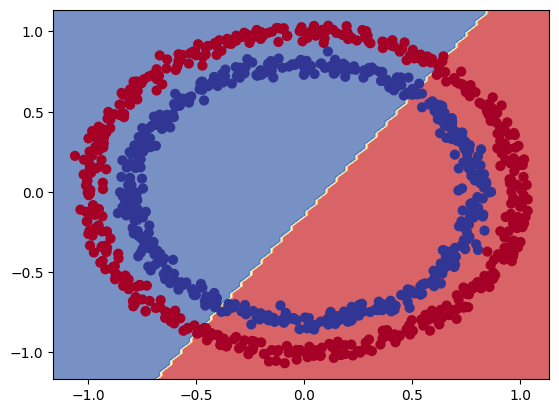

In [15]:
plot_decision_boudary(model_3, X, y)

In [16]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100,5) # y = X + 100

# Split regression data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 388.3309 - mae: 388.3309
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 256.7209 - mae: 256.7209
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 128.9514 - mae: 128.9514
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 51.0877 - mae: 51.0877
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 84.8633 - mae: 84.8633
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 69.3752 - mae: 69.3752
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7422 - mae: 43.7422
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.4462 - mae: 51.4462
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4187 - mae: 42.4187
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 45.7600 - mae: 45.7600
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


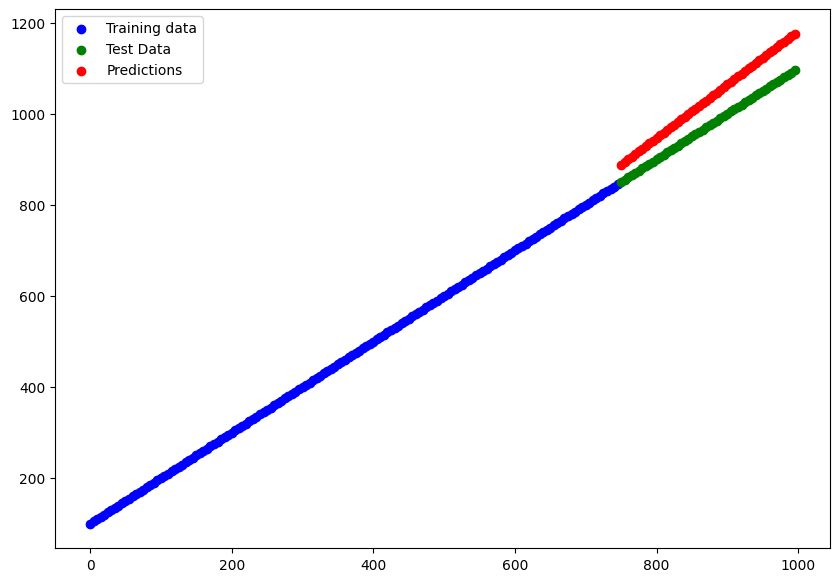

In [17]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "Test Data")
plt.scatter(X_reg_test,y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [23]:
# Let's build the same model from TF Playground
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation= tf.keras.activations.linear)
])

model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3206 - accuracy: 0.4050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2715 - accuracy: 0.4160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2154 - accuracy: 0.4280
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1608 - accuracy: 0.4350
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1140 - accuracy: 0.4400
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0651 - accuracy: 0.4410
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0274 - accuracy: 0.4410
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9752 - accuracy: 0.4410
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8466 - accuracy: 0.4420
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8167 - accuracy: 0.4420
Epoch 11/

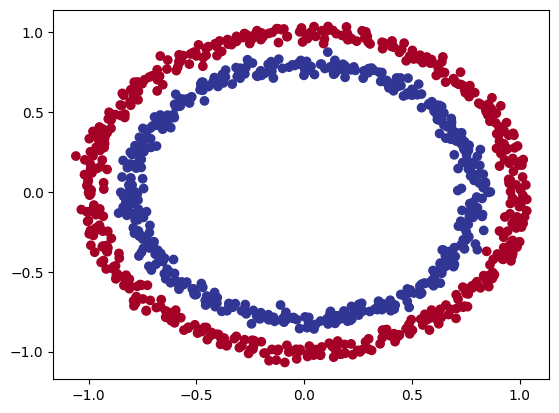

In [24]:
# Check out the data
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Binary


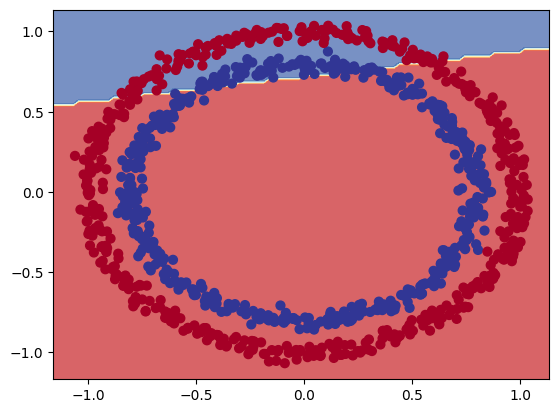

In [25]:
# Check the decision boundary
plot_decision_boundary(model = model_4, X = X, y = y)

In [27]:
# non-linear activation function
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)

])
model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3078 - accuracy: 0.4620
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2855 - accuracy: 0.4640
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2720 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2465 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2350 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2240 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2237 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2235 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2234 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2232 - accuracy: 0.4680
Epoch 11/

In [35]:
# increase number of neurons and layers
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])
history = model_6.fit(X,y,epochs=1000, verbose = 0)

In [36]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9830


[0.04020455479621887, 0.9829999804496765]

313/313 [==============================] - 0s 1ms/step
Binary


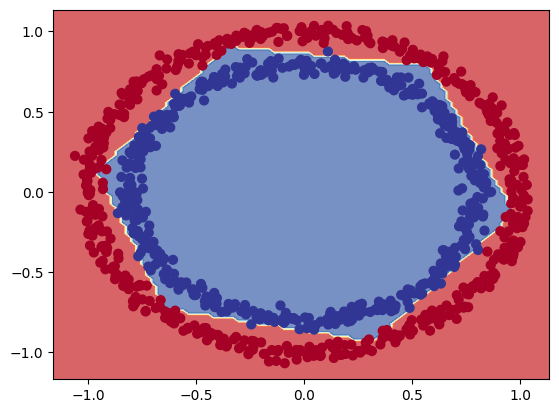

In [37]:
plot_decision_boundary(model_6, X, y)

🤨 Are we evaluating our model correctly? We didn't split the data into training and test sets!

In [39]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

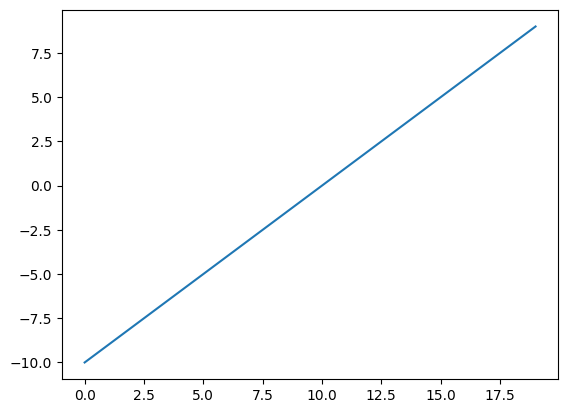

In [40]:
plt.plot(A)

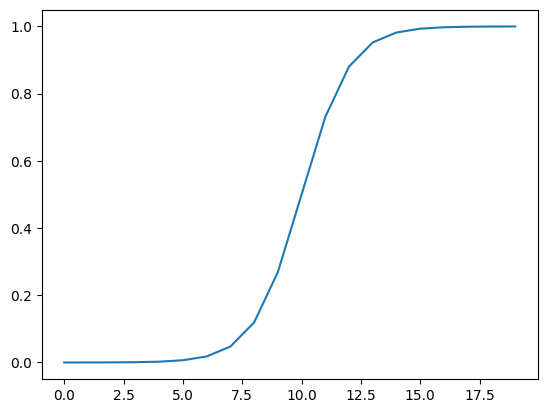

In [45]:
# sigmoid(x) = 1/ (1 + exp(-x))
# all output values between 0 and 1
B = tf.keras.activations.sigmoid(A)
plt.plot(B)

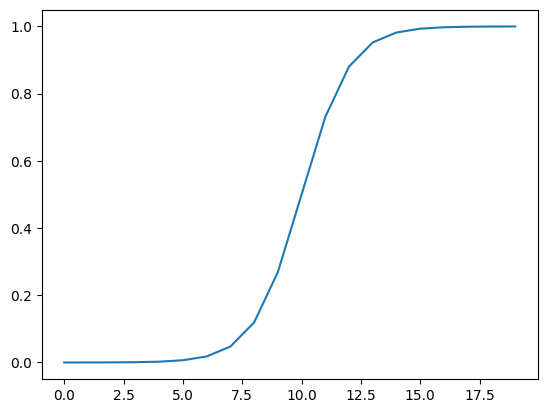

In [46]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
C = sigmoid(A)
plt.plot(C)

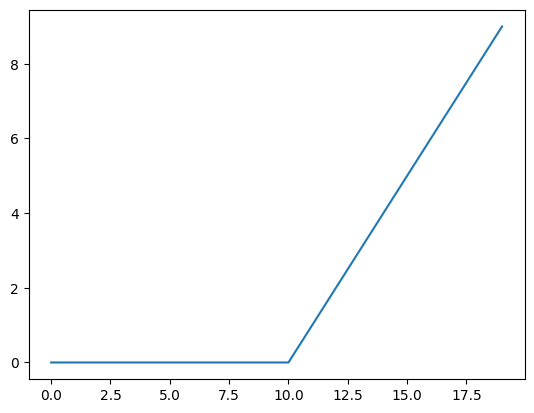

In [48]:
# relu is max(x, 0); turns all negative values to 0
def relu(x):
  return tf.maximum(x,0)

D = relu(A)
plt.plot(D)

In [49]:
# linear activation function: returns the input unmodified
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

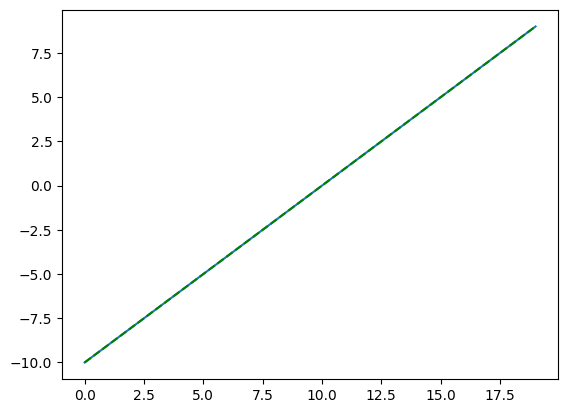

In [51]:
plt.plot(tf.keras.activations.linear(A))
plt.plot(A, "g--")

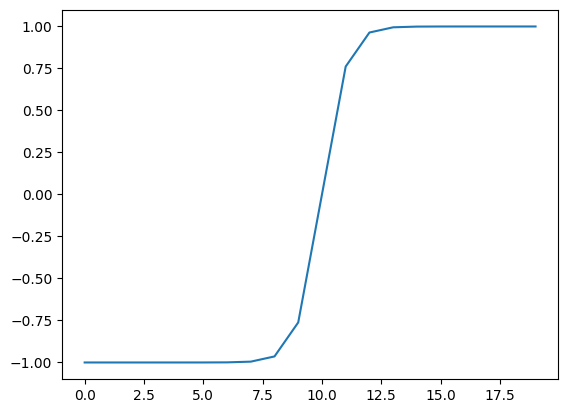

In [53]:
# tanh(x) = sinh(x) / cosh(x); output values betwee -1 and 1
plt.plot(tf.keras.activations.tanh(A))

## Evaluating and improving our classification

In [54]:
# Check how many examples we have
len(X)

1000

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [56]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [57]:
# Let's recreate a model to fit on training data and evaluate on test data
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_7.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])
history = model_7.fit(X_train, y_train, epochs=100, verbose = 0)

In [58]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9800


[0.036490362137556076, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
Binary
313/313 [==============================] - 0s 1ms/step
Binary


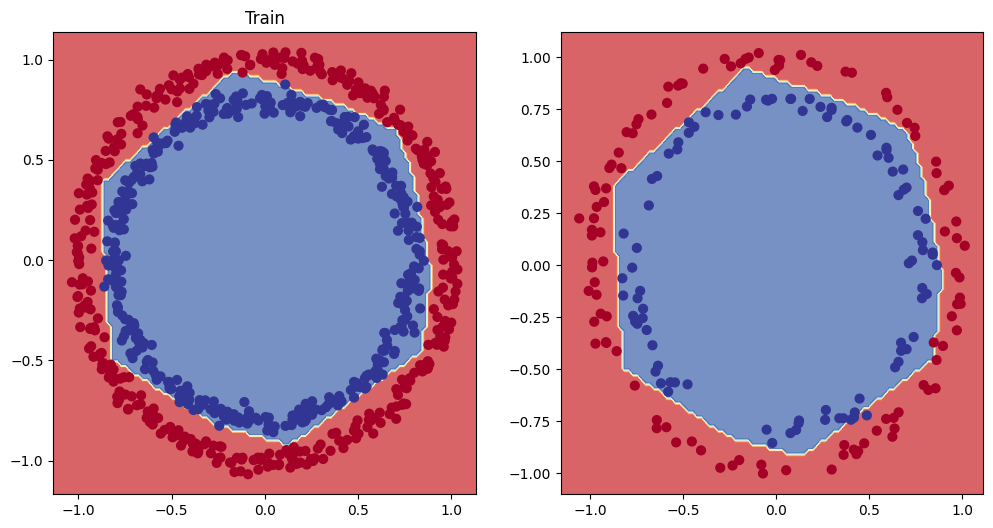

In [60]:
# plot decision boundaries for training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_7, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [61]:
history.history

{'loss': [0.6983332633972168,
  0.6903427839279175,
  0.6867006421089172,
  0.6826016306877136,
  0.6782112121582031,
  0.671393871307373,
  0.6625902056694031,
  0.652803361415863,
  0.6358329057693481,
  0.617702841758728,
  0.5974487066268921,
  0.5738267302513123,
  0.5504663586616516,
  0.5208646655082703,
  0.4861065745353699,
  0.4556683599948883,
  0.4295122027397156,
  0.4015398919582367,
  0.38546547293663025,
  0.3547348380088806,
  0.32274413108825684,
  0.31891414523124695,
  0.276641309261322,
  0.25319957733154297,
  0.239254891872406,
  0.2285175770521164,
  0.21440793573856354,
  0.20348025858402252,
  0.20127582550048828,
  0.1839379519224167,
  0.1877709925174713,
  0.17518159747123718,
  0.16460706293582916,
  0.15357336401939392,
  0.1353573501110077,
  0.12527909874916077,
  0.11392460763454437,
  0.10332001000642776,
  0.10696613043546677,
  0.09224959462881088,
  0.09082324057817459,
  0.08415362238883972,
  0.0828578844666481,
  0.08215348422527313,
  0.0710166

In [62]:
# convert history object into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.698333,0.48625
1,0.690343,0.51500
2,0.686701,0.53125
3,0.682602,0.53750
4,0.678211,0.56125
...,...,...
95,0.030987,0.99625
96,0.037596,0.98875
97,0.037306,0.99000
98,0.036202,0.99250


Text(0.5, 1.0, 'Model 7 loss curves')

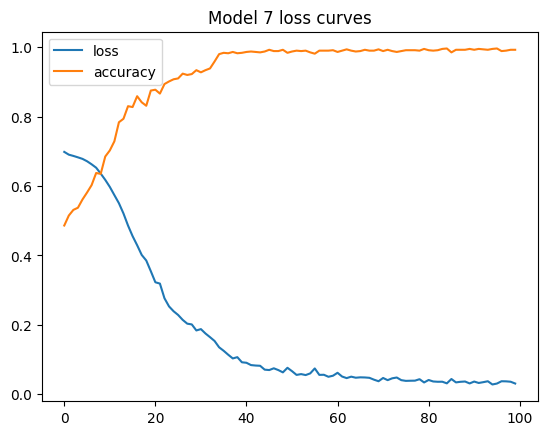

In [64]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 7 loss curves")

**Note:** For many problem, the loss function going down means the model is improving (the predictions it's making are getting closer to ground truth labels)

## Finding the best learning rate

* A learning rate **callback** - extra piece of functionality *while* it's training
* Another model
* A modified loss curves plot

In [66]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss= "binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_8 = model_8.fit(X_train,y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

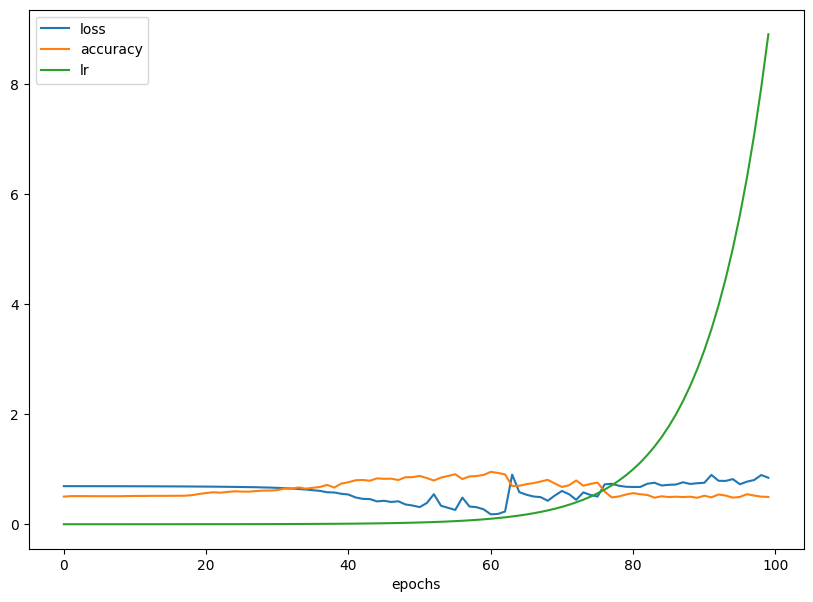

In [67]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

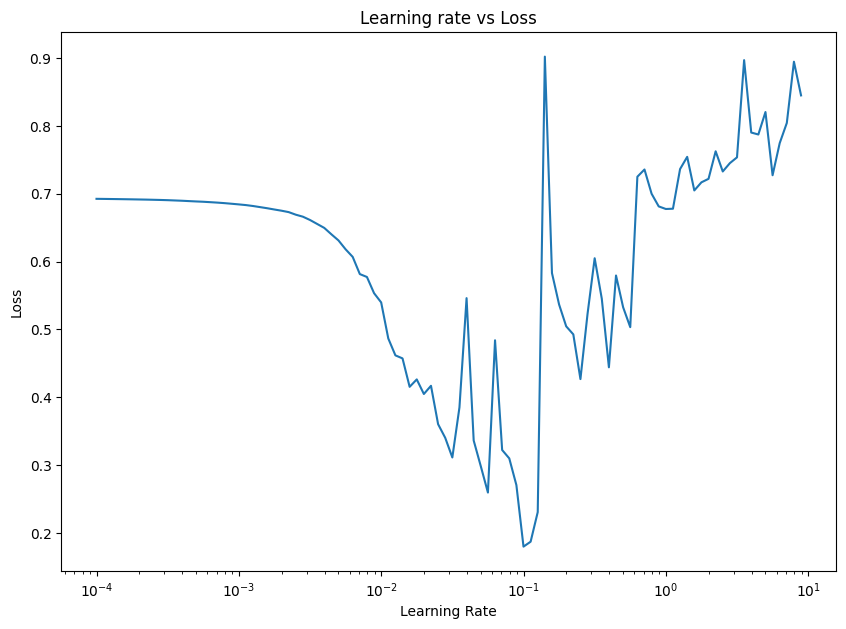

In [69]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [70]:
# Example of other typical learning rates:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [71]:
# Let's try using a higher learning rate
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(4,activation= "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics = ["accuracy"])
history_9 = model_9.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.7007 - accuracy: 0.4913
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5487
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.6162
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.6562
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5850 - accuracy: 0.7275
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.7825
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.7912
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8112
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8475
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3011 - accuracy: 0.9287
Epoch 11/20
25/25 [

In [72]:
# Evaluate model 9 on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9950


[0.05436216667294502, 0.9950000047683716]

In [74]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0365 - accuracy: 0.9800


[0.036490362137556076, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Binary
313/313 [==============================] - 0s 1ms/step
Binary


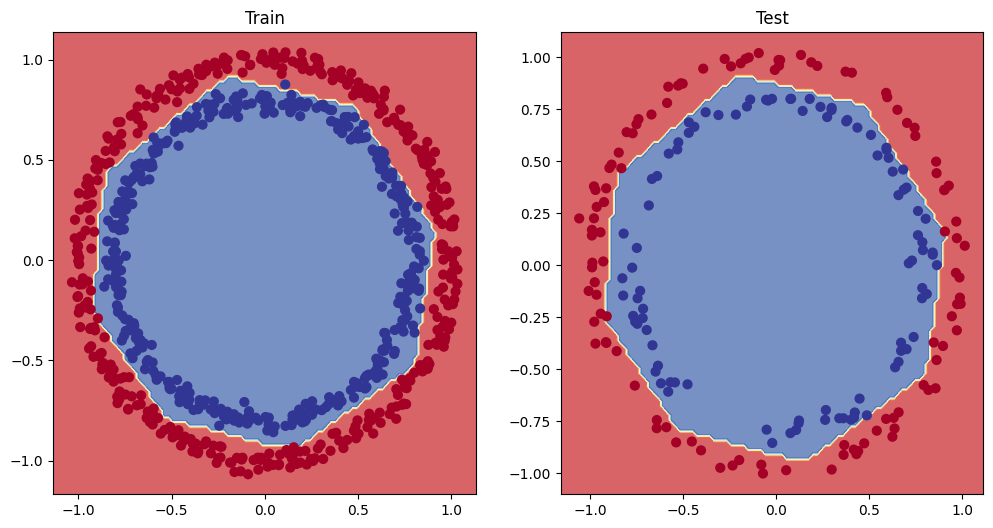

In [75]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X_test, y_test)
plt.show()